# <a name="0">Hierarchical Clustering</a>

1. <a href="#0">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
5. <a href="#5">K means</a>
6. <a href="#5">Training datasets</a>
7. <a href="#6">Improvement ideas</a>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/code/sadkoktaybicici/credit-card-data-clustering-k-mean/data
then import it in python.

In [2]:
#read the data

#data_path = ''  #the path where you downloaded the data
df = pd.read_csv('CC GENERAL.csv',index_col ='CUST_ID')

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 17)


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [3]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CRED

In [4]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

BALANCE                             0.00
BALANCE_FREQUENCY                   0.00
PURCHASES                           0.00
ONEOFF_PURCHASES                    0.00
INSTALLMENTS_PURCHASES              0.00
CASH_ADVANCE                        0.00
PURCHASES_FREQUENCY                 0.00
ONEOFF_PURCHASES_FREQUENCY          0.00
PURCHASES_INSTALLMENTS_FREQUENCY    0.00
CASH_ADVANCE_FREQUENCY              0.00
CASH_ADVANCE_TRX                    0.00
PURCHASES_TRX                       0.00
CREDIT_LIMIT                        0.01
PAYMENTS                            0.00
MINIMUM_PAYMENTS                    3.50
PRC_FULL_PAYMENT                    0.00
TENURE                              0.00
dtype: float64

In [6]:
# This will print basic statistics for numerical columns
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
# feel free to investigate what you want

In [8]:
df.duplicated().sum()

0

In [9]:
df[df.duplicated()]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,


In [10]:
import seaborn as sns 

<AxesSubplot:>

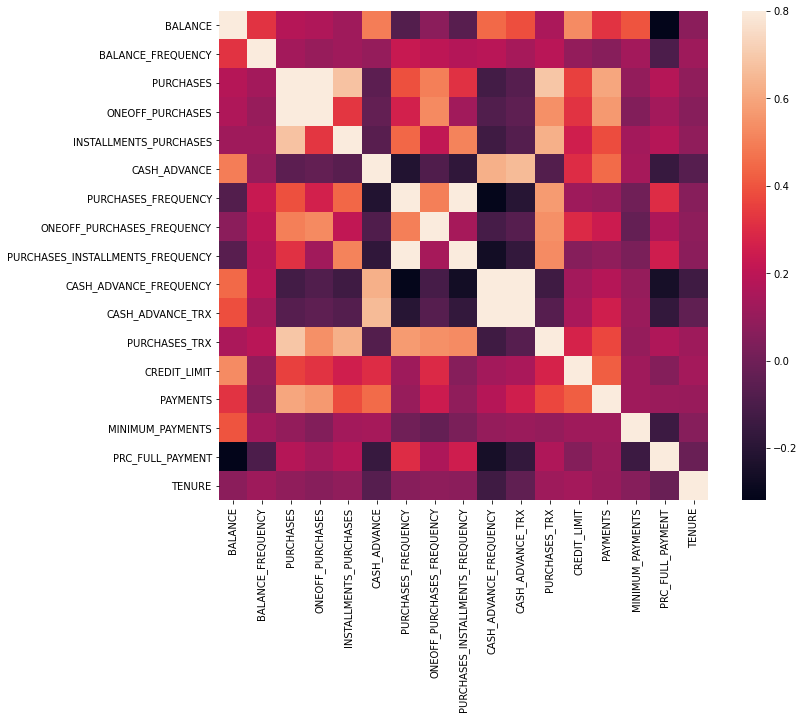

In [11]:
corrMat = df.corr()
f , ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrMat,vmax = 0.8 ,square=True)

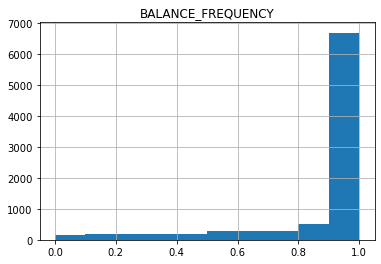

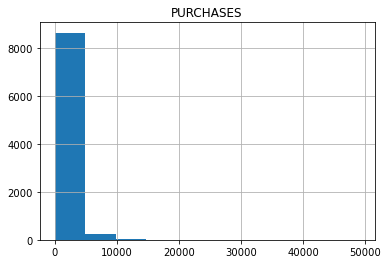

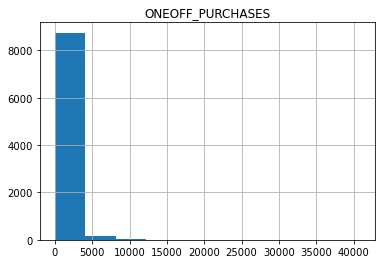

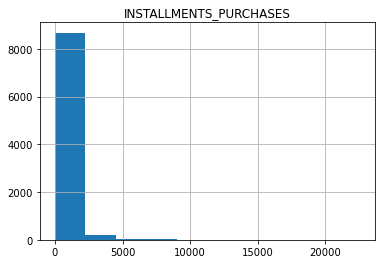

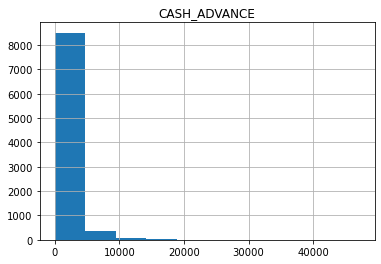

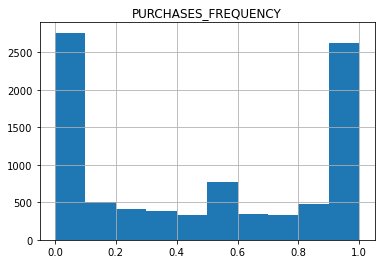

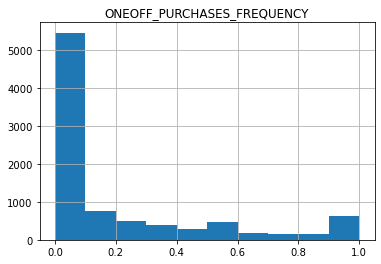

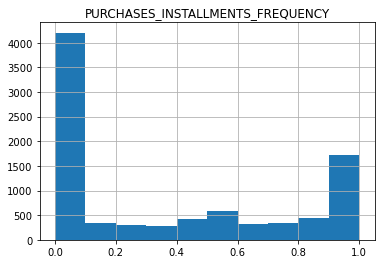

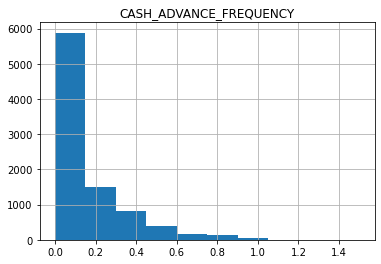

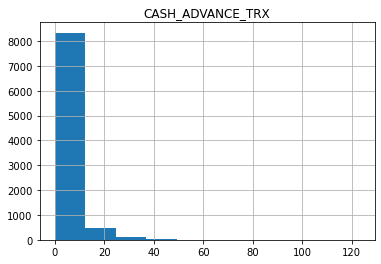

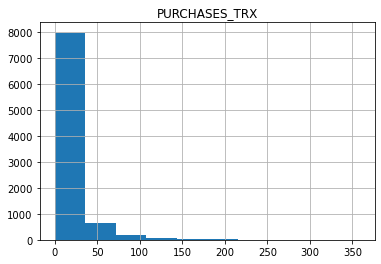

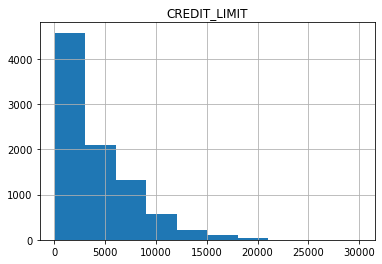

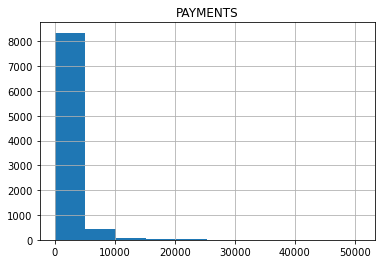

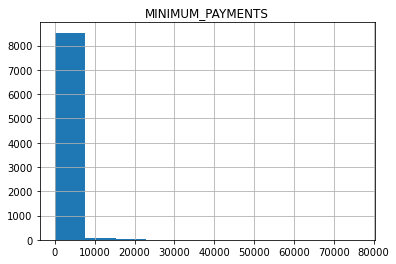

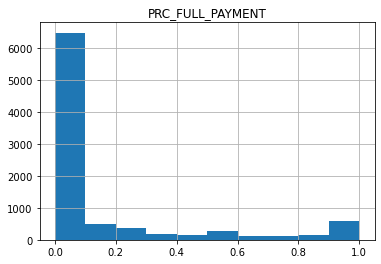

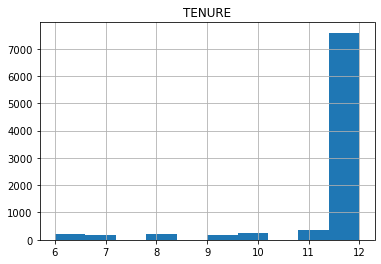

In [12]:
for c in list(df.columns)[1:]:
    df[c].hist()
    plt.title(c)
    plt.show()

<AxesSubplot:>

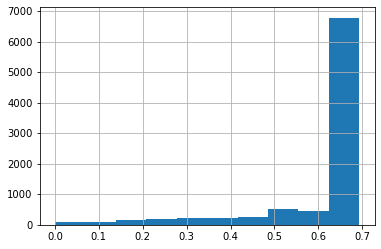

In [13]:
np.log1p(df['BALANCE_FREQUENCY']).hist()

In [14]:
df.skew().sort_values(ascending=False)

MINIMUM_PAYMENTS                    13.622797
ONEOFF_PURCHASES                    10.045083
PURCHASES                            8.144269
INSTALLMENTS_PURCHASES               7.299120
PAYMENTS                             5.907620
CASH_ADVANCE_TRX                     5.721298
CASH_ADVANCE                         5.166609
PURCHASES_TRX                        4.630655
BALANCE                              2.393386
PRC_FULL_PAYMENT                     1.942820
CASH_ADVANCE_FREQUENCY               1.828686
ONEOFF_PURCHASES_FREQUENCY           1.535613
CREDIT_LIMIT                         1.522464
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
PURCHASES_FREQUENCY                  0.060164
BALANCE_FREQUENCY                   -2.023266
TENURE                              -2.943017
dtype: float64

In [15]:
from scipy import stats
def Outliers(col):
    z = np.abs(stats.zscore(col))
    print(np.where(z > 3))

In [16]:
df['BALANCE'][0]

40.900749

In [17]:
Outliers(df['BALANCE'])

(array([  30,   87,   90,  120,  124,  128,  133,  138,  143,  153,  174,
        203,  220,  248,  249,  265,  304,  321,  352,  371,  376,  380,
        387,  393,  416,  429,  453,  491,  495,  501,  520,  550,  551,
        552,  569,  577,  585,  591,  615,  643,  669,  708,  716,  723,
        755,  768,  780,  782,  842,  851,  853,  856,  866,  883,  886,
        939, 1012, 1059, 1109, 1195, 1211, 1318, 1350, 1359, 1410, 1424,
       1447, 1450, 1522, 1547, 1585, 1624, 1655, 1660, 1697, 1767, 1772,
       1781, 1795, 1817, 1845, 1920, 1924, 1936, 1988, 2001, 2003, 2051,
       2079, 2088, 2159, 2212, 2263, 2349, 2361, 2387, 2403, 2422, 2441,
       2454, 2485, 2593, 2631, 2645, 2657, 2660, 2780, 2823, 2834, 2839,
       2878, 2923, 2966, 3118, 3123, 3141, 3171, 3181, 3197, 3210, 3264,
       3267, 3404, 3484, 3491, 3501, 3510, 3652, 3691, 3712, 3771, 3806,
       3840, 3921, 3925, 3944, 3984, 4016, 4089, 4102, 4103, 4140, 4194,
       4232, 4249, 4252, 4368, 4376, 4426, 4437, 4

## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1-  There are few missing values we can deal them and there are no duplicates so it's a good thing        <br> 
2-  I noticed that most of columns are skewed by viewing its distributions       <br>
3-  There are a lot of Outliers in the data         <br>

In [18]:
#make a copy for the original dataset
df_copy=df.copy()

In [19]:
df_copy['BALANCE']

CUST_ID
C10001      40.900749
C10002    3202.467416
C10003    2495.148862
C10004    1666.670542
C10005     817.714335
             ...     
C19186      28.493517
C19187      19.183215
C19188      23.398673
C19189      13.457564
C19190     372.708075
Name: BALANCE, Length: 8950, dtype: float64

### for each issue adapt this methodology 
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

**First issue**

In [20]:
#solution 
# I'll fill the missing values with the median because of the outliers 

df_copy.fillna(df.median(),inplace=True)

In [21]:
#test 
round(df_copy.isnull().sum(axis=0)*100/df_copy.shape[0],2)

BALANCE                             0.0
BALANCE_FREQUENCY                   0.0
PURCHASES                           0.0
ONEOFF_PURCHASES                    0.0
INSTALLMENTS_PURCHASES              0.0
CASH_ADVANCE                        0.0
PURCHASES_FREQUENCY                 0.0
ONEOFF_PURCHASES_FREQUENCY          0.0
PURCHASES_INSTALLMENTS_FREQUENCY    0.0
CASH_ADVANCE_FREQUENCY              0.0
CASH_ADVANCE_TRX                    0.0
PURCHASES_TRX                       0.0
CREDIT_LIMIT                        0.0
PAYMENTS                            0.0
MINIMUM_PAYMENTS                    0.0
PRC_FULL_PAYMENT                    0.0
TENURE                              0.0
dtype: float64

**Second issue**

In [22]:
#solution 
# I'll will convert the needed columns to be normaml distributed by 'log1p' function
for col in df_copy.columns[1:-2] :
    df_copy[col] = np.log1p(df_copy[col])

In [23]:
#test 
df_copy.skew().sort_values(ascending=False) # I think that's better :) 


BALANCE                             2.393386
PRC_FULL_PAYMENT                    1.942820
CASH_ADVANCE_FREQUENCY              1.455462
ONEOFF_PURCHASES_FREQUENCY          1.290617
CASH_ADVANCE_TRX                    0.940131
PURCHASES_INSTALLMENTS_FREQUENCY    0.373620
MINIMUM_PAYMENTS                    0.269703
CASH_ADVANCE                        0.262594
ONEOFF_PURCHASES                    0.185854
PURCHASES_TRX                       0.032697
INSTALLMENTS_PURCHASES             -0.024981
PURCHASES_FREQUENCY                -0.089637
CREDIT_LIMIT                       -0.101408
PURCHASES                          -0.764492
PAYMENTS                           -1.778312
BALANCE_FREQUENCY                  -2.285534
TENURE                             -2.943017
dtype: float64

**Third issue**

In [24]:
# solution
# I'll remove the outliers by using Z-Score method 
df_copy = df_copy[(np.abs(stats.zscore(df_copy)) < 3).all(axis=1)]

In [25]:
df_copy.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,7754.000000,7754.000000,7754.000000,7754.000000,7754.000000,7754.000000,7754.000000,7754.000000,7754.000000,7754.000000,7754.000000,7754.000000,7754.000000,7754.000000,7754.000000,7754.000000,7754.000000
mean,1409.329804,0.640701,5.006671,3.316021,3.452750,3.183588,0.371995,0.165715,0.278524,0.103122,0.769274,1.960338,8.089109,6.828279,5.908554,0.163023,11.752902
std,1627.839573,0.109823,2.895824,3.254167,3.086198,3.507157,0.275673,0.220043,0.282515,0.141344,0.959971,1.369705,0.793981,1.091984,1.041695,0.297574,0.793577
min,0.275257,0.182322,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.707110,2.622721,2.549666,0.000000,8.000000
25%,158.157307,0.646627,4.020919,0.000000,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,0.000000,0.693147,7.438972,6.090329,5.152871,0.000000,12.000000
50%,900.266842,0.693147,6.008531,3.988984,4.689510,0.000000,0.405465,0.080042,0.223144,0.000000,0.000000,2.197225,8.006701,6.809695,5.743736,0.000000,12.000000
75%,1955.114566,0.693147,7.081944,6.441716,6.214528,6.880850,0.650588,0.287682,0.559616,0.154151,1.609438,2.995732,8.699681,7.545764,6.638015,0.166667,12.000000
max,7803.470739,0.693147,10.597677,10.436722,10.021315,10.176171,0.693147,0.693147,0.693147,0.575364,3.828641,5.883322,10.308986,10.834125,9.413934,1.000000,12.000000


## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

Answer here:

In [26]:
from sklearn.preprocessing import StandardScaler
df_copy_standard_scaled = StandardScaler().fit_transform(df_copy)

In [27]:
from sklearn.preprocessing import MinMaxScaler
df_copy_minmax_scaled = MinMaxScaler().fit_transform(df_copy)

In [28]:
from sklearn.preprocessing import normalize
df_copy_normalized = normalize(df_copy)

## 5. <a name="5">K Means</a>
(<a href="#5">Go to top</a>)

1- Use the k means class that you implemented in the previous task to cluster this data
2- Use http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html and see if the difference in the result
3- Use elbow method to determine the K (plot the result using two plot one for distorion and another for inertia)
4- (Optionally) make a method that pick the best number of clusters for you 
5- Using different techniques for scaling and comment on the result

In [29]:
from scipy.spatial.distance import cdist
class K_Means() :
    #centroids = 0
    def __init__(self,X,K):
        self.X = X
        self.K = K
    def kMeansInitCentroids(self,X, K):
        np.random.shuffle(X)
        centroids = X[:K, :]  
        return centroids
    
    def findClosestCentroids(self,X, centroids):
        matrix = cdist(X,centroids)
        idx = np.argmin(matrix, axis=1)
        return idx
    
    def computeCentroids(self,X, idx, K):
        centroids = np.zeros((K,X.shape[1]))
        for k in range(K):
            _class = X[idx == k]
            mean = np.mean(_class,axis=0)
            centroids[k,:] = mean 
        return centroids
        
    def fit(self,iterations=100):
        centroids = self.kMeansInitCentroids(self.X,self.K)
        for i in range(iterations):
            idx = self.findClosestCentroids(self.X, centroids)
            centroids = self.computeCentroids(self.X, idx,self.K)
        return centroids , idx 
    def predict(self,x):
        dist = cdist(centroids,x)
        return np.argmin(dist,axis=0)

In [31]:
model = K_Means(df_copy_standard_scaled,3)

In [32]:
centroids , idx = model.fit()

In [36]:
df_copy['MyModel_preds'] = model.predict(df_copy_standard_scaled)

In [37]:
from sklearn.cluster import KMeans

kmeans_stand = KMeans(n_clusters=3).fit(df_copy_standard_scaled)

In [38]:
df_copy['Sklearn_preds_standard'] = kmeans_stand.labels_

In [39]:
kmeans_minmax = KMeans(n_clusters=3).fit(df_copy_minmax_scaled)

In [40]:
df_copy['Sklearn_preds_minmax'] = kmeans_minmax.labels_

In [41]:
kmeans_norm = KMeans(n_clusters=3).fit(df_copy_normalized)

In [42]:
df_copy['Sklearn_preds_normalized'] = kmeans_norm.labels_

Text(0.5, 1.0, 'skl_Normalized scaler predictions ')

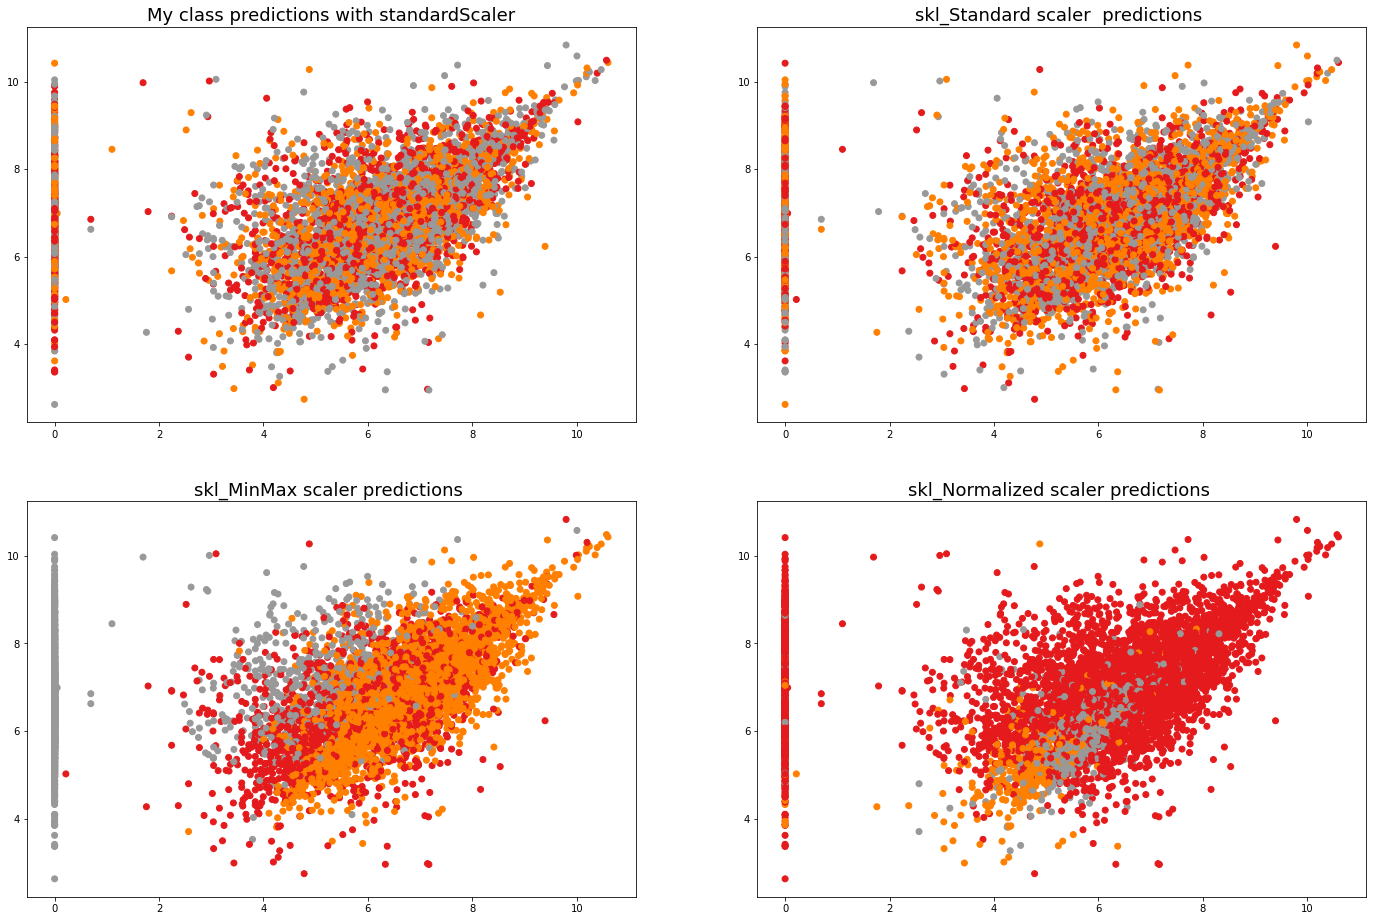

In [44]:
fig, axes = plt.subplots(2, 2, figsize=(24,16))
axes[0,0].scatter(df_copy['PURCHASES'], df_copy['PAYMENTS'], c=df_copy['MyModel_preds'],cmap=plt.cm.Set1)
axes[0,1].scatter(df_copy['PURCHASES'], df_copy['PAYMENTS'], c=df_copy['Sklearn_preds_standard'], cmap=plt.cm.Set1)
axes[0,0].set_title('My class predictions with standardScaler', fontsize=18)
axes[0,1].set_title('skl_Standard scaler  predictions ', fontsize=18)
axes[1,0].scatter(df_copy['PURCHASES'], df_copy['PAYMENTS'], c=df_copy['Sklearn_preds_minmax'],cmap=plt.cm.Set1)
axes[1,1].scatter(df_copy['PURCHASES'], df_copy['PAYMENTS'], c=df_copy['Sklearn_preds_normalized'], cmap=plt.cm.Set1)
axes[1,0].set_title('skl_MinMax scaler predictions ', fontsize=18)
axes[1,1].set_title('skl_Normalized scaler predictions ', fontsize=18)


In [45]:
distortions = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_copy_normalized)
    distortions.append(kmeans.inertia_)

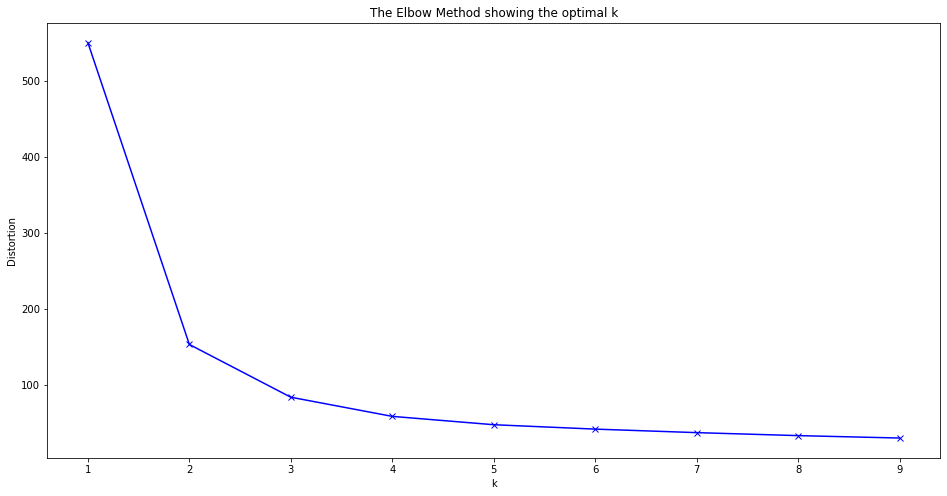

In [46]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [51]:
# silhouette_score for StandardScaler data 
from sklearn.metrics import silhouette_score
score = silhouette_score(df_copy_standard_scaled, kmeans_stand.labels_, metric='euclidean')

In [52]:
score

0.2189522500072331

In [53]:
# silhouette_score for MinMax scaler data 
score = silhouette_score(df_copy_minmax_scaled,kmeans_minmax.labels_, metric='euclidean')

In [54]:
score

0.2672262513225884

In [56]:
# silhouette_score for normalize scaler data 
score = silhouette_score(df_copy_normalized,kmeans_norm.labels_, metric='euclidean')

In [57]:
score

0.7768560454738542

## The Normalized one is the best

## 6. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
2- Distance function:
    - Euclidean Distance 
    - Manhattan Distance 
    - Mahalanobis distance 
3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

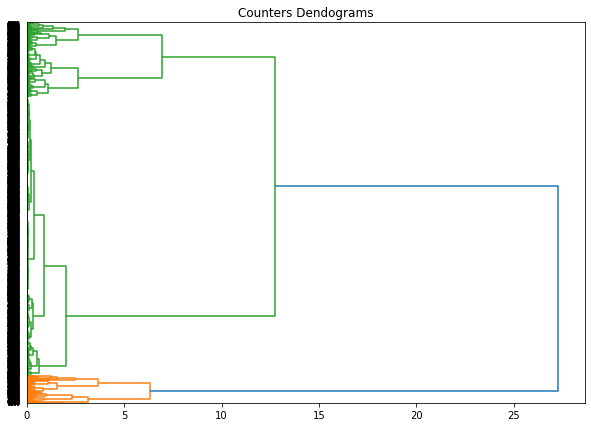

In [59]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=pd.DataFrame(df_copy_normalized), method='ward',metric='euclidean'),orientation='right') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

In [75]:
#training
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters = 2).fit(df_copy_normalized)




In [76]:
clustering.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [77]:
score = silhouette_score(df_copy_normalized,clustering.labels_, metric='euclidean')

In [78]:
score

0.8248189746040083

## 6. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method 